## Bakery Market Basket Analysis



### Import Libraries







In [1]:
# Importation of libraries
import pandas as pd
import numpy as np
import io

import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import mlxtend as ml

import pickle



### IMPORTING THE DATASET 







In [2]:
# importing the dataset 
imported_df = pd.read_csv('BreadBasket_DMS.csv', header = 0)
imported_df.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam



### FEATURE IDENTIFICATION

In [32]:
# informationS of the dataset
display(imported_df.info())

# get the descriptive information of the dataset mean,median etc of transaction
display(imported_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


None

,Transaction
count,21293.000000
mean,4951.990889
std,2787.758400
min,1.000000
25%,2548.000000
50%,5067.000000
75%,7329.000000
max,9684.000000


### INFORMATION OF MISSING VALUES

In [3]:
# checking wether there are any null values in the dataset

nulL_info = pd.DataFrame(imported_df.dtypes).T.rename(index={0:'column type'})
nulL_info = nulL_info.append(pd.DataFrame(imported_df.isnull().sum()).T.rename(index={0:'null values'}))
nulL_info = nulL_info.append(pd.DataFrame(imported_df.isnull().sum()/imported_df.shape[0]*100).T.rename(index={0:'null values (%)'}))

## if there are any null values print the information of the nulls 
if(any(imported_df.isnull().any())):
    print()
    display(nulL_info)
else:
    print('NO missing data')

NO missing data


Check for hidden missing values


In [4]:
### Let's check the 'hidden' missing values in the dataset
missing_val = ["NaN", "NONE", "None", "Nil", "nan", "none", "nil", 0]


print("There are {0} 'hidden' missing values in the 'Item'column.".format(len(imported_df[imported_df.Item.isin(missing_val)])))
print("There are {0} 'hidden' missing values in the 'Transaction'.".format(len(imported_df[imported_df.Transaction.isin(missing_val)])))

imported_df[imported_df.Item.isin(missing_val)].head()

There are 786 'hidden' missing values in the 'Item'column.
There are 0 'hidden' missing values in the 'Transaction'.


,Date,Time,Transaction,Item
26,2016-10-30,10:27:21,11,NONE
38,2016-10-30,10:34:36,15,NONE
39,2016-10-30,10:34:36,15,NONE
66,2016-10-30,11:05:30,29,NONE
80,2016-10-30,11:37:10,37,NONE


### REMOVING THE MISSING DATA POINTS


In [10]:
## droping the NONE data item from the dataset
Bakery = imported_df.drop(imported_df[imported_df.Item == "NONE"].index)
print("number of rows: {0:,} (original had 21,293) ".format(len(Bakery)))
print('----------------------------------------')
Bakery.head()

## After removing the missing values, the number of rows left is 20,507 (original 21,293 minus 786 missing)

number of rows: 20,507 (original had 21,293) 
----------------------------------------


,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


### Dataset Transformation


Convert to DatetimeIndex


Extract hour and days of week


In [11]:


Bakery.head()

file_name = 'bakery_initial.sav'
pickle.dump(Bakery, open(file_name, 'wb'))

### Exploring data attributes

Top 10 items

In [14]:
# Rank the top 10 best-selling items
counts = Bakery.Item.value_counts()
percent = Bakery.Item.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
top_10 = pd.DataFrame({'counts': counts, '%': percent})[:10]

print('-----------------------------')
print('Top 10 items')
print('-----------------------------')
display(top_10)

-----------------------------
Top 10 items
-----------------------------


,counts,%
Coffee,5471,26.7%
Bread,3325,16.2%
Tea,1435,7.0%
Cake,1025,5.0%
Pastry,856,4.2%
Sandwich,771,3.8%
Medialuna,616,3.0%
Hot chocolate,590,2.9%
Cookies,540,2.6%
Brownie,379,1.8%


Bar Charts

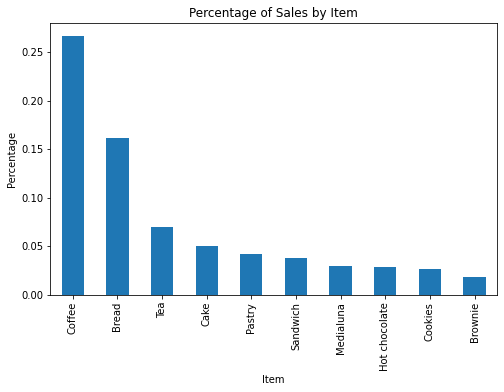

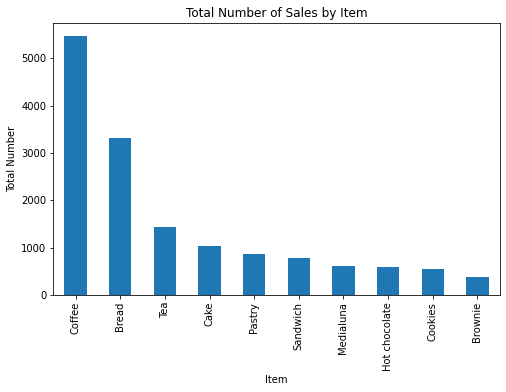

In [15]:
# COUNT BY PERCENTAGE
plt.figure(figsize=(8,5))
Bakery.Item.value_counts(normalize=True)[:10].plot(kind="bar", title="Percentage of Sales by Item").set(xlabel="Item", ylabel="Percentage")
plt.show()

# COUNT BY VALUE
plt.figure(figsize=(8,5))
Bakery.Item.value_counts()[:10].plot(kind="bar", title="Total Number of Sales by Item").set(xlabel="Item", ylabel="Total Number")
plt.show()

## ASSOCIATION RULE MACHINE LEARNING ALGORITHM
---

### Preparing the dataset to Machine Learning

In [16]:
# Define dataset to machine learning
## Taking only the Transaction column and the Item column and group them
df_basket = Bakery.groupby(["Transaction","Item"]).size().reset_index(name="Count")

## creating the matrix using Transaction, item counts
market_basket = (df_basket.groupby(['Transaction', 'Item'])['Count'].sum().unstack().reset_index().fillna(0).set_index('Transaction'))
market_basket.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# Convert all of our numbers to either a 1 or a 0 (negative numbers are converted to zero, positive numbers are converted to 1)
## encoding of the data 
def encode_data(datapoint):
  if datapoint <= 0:
    return 0
  else:
    return 1

In [18]:
# Process the transformation into the market_basket dataset
## applying the encoding map to the data
market_basket = market_basket.applymap(encode_data)

# Check the result
market_basket.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Building the APRIORI model

In [52]:
# Apriori method request a min_support: Support is defined as the percentage of time that an itemset appears in the dataset.
# Defined to start seeing data/results with min_support of 2%
itemsets = apriori(market_basket, min_support= 0.02,max_len=3, use_colnames=True)
print(itemsets)

     support                 itemsets
0   0.036344              (Alfajores)
1   0.327205                  (Bread)
2   0.040042                (Brownie)
3   0.103856                   (Cake)
4   0.478394                 (Coffee)
5   0.054411                (Cookies)
6   0.039197             (Farm House)
7   0.058320          (Hot chocolate)
8   0.038563                  (Juice)
9   0.061807              (Medialuna)
10  0.038457                 (Muffin)
11  0.086107                 (Pastry)
12  0.071844               (Sandwich)
13  0.029054           (Scandinavian)
14  0.034548                  (Scone)
15  0.034443                   (Soup)
16  0.142631                    (Tea)
17  0.033597                  (Toast)
18  0.020285               (Truffles)
19  0.023349            (Bread, Cake)
20  0.090016          (Bread, Coffee)
21  0.029160          (Pastry, Bread)
22  0.028104             (Tea, Bread)
23  0.054728           (Cake, Coffee)
24  0.023772              (Tea, Cake)
25  0.028209

In [53]:
# Build your association rules using the mxltend association_rules function.
# min_threshold can be thought of as the level of confidence percentage that you want to return
# Defined to use 10% of min_threshold
rules = association_rules(itemsets, metric='lift', min_threshold=0.1)
print(rules)

        antecedents      consequents  antecedent support  consequent support  \
0           (Bread)           (Cake)            0.327205            0.103856   
1            (Cake)          (Bread)            0.103856            0.327205   
2           (Bread)         (Coffee)            0.327205            0.478394   
3          (Coffee)          (Bread)            0.478394            0.327205   
4          (Pastry)          (Bread)            0.086107            0.327205   
5           (Bread)         (Pastry)            0.327205            0.086107   
6             (Tea)          (Bread)            0.142631            0.327205   
7           (Bread)            (Tea)            0.327205            0.142631   
8            (Cake)         (Coffee)            0.103856            0.478394   
9          (Coffee)           (Cake)            0.478394            0.103856   
10            (Tea)           (Cake)            0.142631            0.103856   
11           (Cake)            (Tea)    

In [54]:
# Below the list of products sales combinations
# It can use this information to build a cross-sell recommendation system that promotes these products with each other 
rules.sort_values("lift", ascending = False, inplace = True)
rules.head(10)

print(rules)

        antecedents      consequents  antecedent support  consequent support  \
10            (Tea)           (Cake)            0.142631            0.103856   
11           (Cake)            (Tea)            0.103856            0.142631   
27         (Coffee)          (Toast)            0.478394            0.033597   
26          (Toast)         (Coffee)            0.033597            0.478394   
19         (Coffee)      (Medialuna)            0.478394            0.061807   
18      (Medialuna)         (Coffee)            0.061807            0.478394   
21         (Coffee)         (Pastry)            0.478394            0.086107   
20         (Pastry)         (Coffee)            0.086107            0.478394   
16          (Juice)         (Coffee)            0.038563            0.478394   
17         (Coffee)          (Juice)            0.478394            0.038563   
23         (Coffee)       (Sandwich)            0.478394            0.071844   
22       (Sandwich)         (Coffee)    

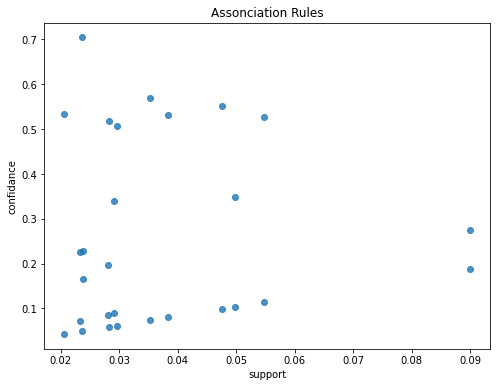

In [55]:
support = rules.support.to_numpy()
confidence = rules.confidence.to_numpy()

for i in range (len(support)):
    support[i] = support[i]
    confidence[i] = confidence[i]

plt.figure(figsize=(8,6))    
plt.title('Assonciation Rules')
plt.xlabel('support')
plt.ylabel('confidance')
sns.regplot(x=support, y=confidence, fit_reg=False)
plt.show()

### Recommendations filter


In [56]:
# Recommendation of Market Basket
rec_rules = rules[ (rules['lift'] > 1) & (rules['confidence'] >= 0.2) ]

In [57]:
# Recommendation of Market Basket Dataset
cols_keep = {'antecedents':'antecedents', 'consequents':'consequents', 'support':'support', 'confidence':'confidence', 'lift':'lift'}
cols_drop = ['antecedent support', 'consequent support', 'leverage', 'conviction']

recommendation_basket = pd.DataFrame(rec_rules).rename(columns= cols_keep).sort_values(by=['lift'], ascending = False)
recommendation_basket['antecedents'] = recommendation_basket['antecedents'].str.join(',')
recommendation_basket['consequents'] = recommendation_basket['consequents'].str.join(',')
display(recommendation_basket)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
11,Cake,Tea,0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865
26,Toast,Coffee,0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
18,Medialuna,Coffee,0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
20,Pastry,Coffee,0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
16,Juice,Coffee,0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
22,Sandwich,Coffee,0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
8,Cake,Coffee,0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
12,Cookies,Coffee,0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174
14,Hot chocolate,Coffee,0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553
4,Pastry,Bread,0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305


## saving the model created

In [50]:
file_name = 'final_model_appriori.sav'
pickle.dump(itemsets, open(file_name, 'wb'))

In [51]:
items = []



for index, row in rules.iterrows():
    new, = row['antecedents']
    ite, = row['consequents']
    print(new == 'Bread')
    if new == 'Bread':
        items.append(ite)
        

print(items)


ValueError: too many values to unpack (expected 1)

In [52]:


"""
network visualization 1
"""

from pyvis.network import Network

Basket_Network1=Network(height="1000px", width="1000px", directed=True, notebook=True)
Basket_Network1.force_atlas_2based()
#Basket_Network1.barnes_hut()
#Basket_Network1.hrepulsion()
#Basket_Network1.repulsion()

Basket_Network_Data_zip=zip(recommendation_basket["antecedents"],
                            recommendation_basket["consequents"],
                            recommendation_basket["antecedent support"],
                            recommendation_basket["consequent support"],
                            recommendation_basket["confidence"])

for i in Basket_Network_Data_zip:
    FromItem=i[0].replace("frozenset({'","").replace("'})","").replace("',　'",",")
    ToItem=i[1].replace("frozenset({'","").replace("'})","").replace("',　'",",")
    FromWeight=i[2]
    ToWeight=i[3]
    EdgeWeight=i[4]

    Basket_Network1.add_node(n_id=FromItem, shape="dot", value=FromWeight,
                            title=FromItem + "<br>Support: " + str(FromWeight))
    Basket_Network1.add_node(n_id=ToItem, shape="dot", value=ToWeight,
                           title=ToItem + "<br>Support: " + str(ToWeight))
    Basket_Network1.add_edge(source=FromItem, to=ToItem, value=EdgeWeight, arrowStrikethrough=False,
                            title=FromItem + " --> " + ToItem + "<br>Confidence:" + str(EdgeWeight))



In [53]:
#Basket_Network1.get_adj_list()
#Basket_Network1.get_edges()
#Basket_Network1.get_network_data()
Basket_Network1.set_edge_smooth(smooth_type="continuous")
Basket_Network1.toggle_hide_edges_on_drag(True)
#Basket_Network1.show_buttons(filter_=False)

Basket_Network1.savef("Basket_Network1.png")
Basket_Network1.show("Basket_Network1.png")

AttributeError: 'Network' object has no attribute 'savef'

In [ ]:


for col in rules.columns:
    print(col)

for i,col in itemsets.columns:
    print(itemsets.iloc[i][col])


antecedents
consequents
antecedent support
consequent support
support
confidence
lift
leverage
conviction


ValueError: too many values to unpack (expected 2)

In [55]:
## replacinf frozenset and pickling

sorted_df = rules.sort_values(["consequent support"], ascending=False).drop_duplicates(["consequent support"],keep = 'last')
print(sorted_df)

   antecedents      consequents  antecedent support  consequent support  \
26     (Toast)         (Coffee)            0.033597            0.478394   
4     (Pastry)          (Bread)            0.086107            0.327205   
11      (Cake)            (Tea)            0.103856            0.142631   
0      (Bread)           (Cake)            0.327205            0.103856   
5      (Bread)         (Pastry)            0.327205            0.086107   
23    (Coffee)       (Sandwich)            0.478394            0.071844   
19    (Coffee)      (Medialuna)            0.478394            0.061807   
15    (Coffee)  (Hot chocolate)            0.478394            0.058320   
13    (Coffee)        (Cookies)            0.478394            0.054411   
17    (Coffee)          (Juice)            0.478394            0.038563   
27    (Coffee)          (Toast)            0.478394            0.033597   

     support  confidence      lift  leverage  conviction  
26  0.023666    0.704403  1.472431  0.00

In [57]:
cols_keep = {'antecedents':'antecedents', 'consequents':'consequents', 'support':'support', 'confidence':'confidence', 'lift':'lift'}
cols_drop = ['antecedent support', 'consequent support', 'leverage', 'conviction']

recommendation_basket = pd.DataFrame(sorted_df).rename(columns= cols_keep).sort_values(by=['confidence'], ascending = False)
recommendation_basket['antecedents'] = recommendation_basket['antecedents'].str.join('()')
recommendation_basket['consequents'] = recommendation_basket['consequents'].str.join('()')
display(recommendation_basket)

Basket_Network_Data_zip=zip(recommendation_basket["antecedents"],
                            recommendation_basket["consequents"],
                            recommendation_basket["antecedent support"],
                            recommendation_basket["consequent support"],
                            recommendation_basket["confidence"])

for i in Basket_Network_Data_zip:
    FromItem=i[0].replace("frozenset({'","").replace("'})","").replace("',　'",",")
    ToItem=i[1].replace("frozenset({'","").replace("'})","").replace("',　'",",")

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
26,Toast,Coffee,0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
4,Pastry,Bread,0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305
11,Cake,Tea,0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865
5,Bread,Pastry,0.327205,0.086107,0.029160,0.089119,1.034977,0.000985,1.003306
23,Coffee,Sandwich,0.478394,0.071844,0.038246,0.079947,1.112792,0.003877,1.008807
19,Coffee,Medialuna,0.478394,0.061807,0.035182,0.073542,1.189878,0.005614,1.012667
0,Bread,Cake,0.327205,0.103856,0.023349,0.071359,0.687097,-0.010633,0.965006
15,Coffee,Hot chocolate,0.478394,0.058320,0.029583,0.061837,1.060311,0.001683,1.003749
13,Coffee,Cookies,0.478394,0.054411,0.028209,0.058966,1.083723,0.002179,1.004841
27,Coffee,Toast,0.478394,0.033597,0.023666,0.049470,1.472431,0.007593,1.016699
